In [1]:
import sys
sys.path.insert(0, '../util')

from layer import *
from plot import *

from __future__ import division
import random
import math
import numpy as np
import pandas as pd
import time

xy = np.mgrid[-1:1:25j, -1:1:25j].reshape(2,-1).T
p = numpy.random.permutation(len(xy))
xy = xy[p]
xyT = xy.T

sphere = np.array(list(map(lambda x: np.square(x[0]) + np.square(x[1]), xy))).reshape(1,-1)
objective_function = sphere


In [2]:

class Particle:
    global input_size
    global computational_layer
    global ouput_layer
    
    def __init__(self, dimensions):
        self.position = np.random.random((dimensions,))
        self.dimensions = dimensions
        self.position_bounds = [-20,20]
        self.velocity_bounds = [(self.position_bounds[1]-self.position_bounds[0])/2, -1 * self.position_bounds[1]]
        self.velocity = np.random.random((dimensions,))
        self.best_position = np.random.random((dimensions,))
        self.best_cost, _ = forward_pass_weights_reg(self.best_position,xyT, objective_function ,input_size, computational_layer, output_layer)
        
        self.c = [2.05,2.05]
        self.learning_rate = 0.65
        
    def evaluate(self, cost):
        if(cost<self.best_cost):
            self.best_cost = cost
            self.best_position = self.position
    
    def update_velocity(self, swarm_best_position, omega):
        self.velocity = 0.6 * (self.velocity) + (self.c[0]*(2.0*random.random()-1.0)*(self.best_position - self.position)) + (self.c[1]*(2.0*random.random()-1.0)*(swarm_best_position - self.position))
        
    def update_position(self):
        self.position = self.position + self.velocity
        self.position = np.vectorize(lambda z: self.position_bounds[1] if z > self.position_bounds[1] else float(z)) (self.position)
        self.position = np.vectorize(lambda z: self.position_bounds[0] if z < self.position_bounds[0] else float(z)) (self.position)
        


In [3]:
class Swarm:
    global input_size
    global computational_layer
    global output_layer
    
    def __init__(self, dimensions, n_population):
        self.particles = [Particle(dimensions) for x in range(n_population)]
        self.swarm_best_particle = self.particles[0]
        self.swarm_best_position = self.particles[0].position
        self.swarm_best_cost, _ = forward_pass_weights_reg(self.swarm_best_position,xyT, objective_function ,input_size, computational_layer, output_layer)
        
    
    def run_n_iterations(self, n_iterations):
        for iteration in range(n_iterations+1):
            omega = float(1.0-(iteration/(n_iterations+1)))
            
            for particle in self.particles:
                particle.update_velocity(self.swarm_best_position, omega)
                particle.update_position()
            
            for particle in self.particles:
                
                cost, _ = forward_pass_weights_reg(particle.position,xyT, objective_function ,input_size, computational_layer, output_layer)

                particle.evaluate(cost)
                if(cost<self.swarm_best_cost):
                    self.swarm_best_particle = particle
                    self.swarm_best_cost = cost
                    self.swarm_best_position = particle.position


In [4]:
input_size = 2
computational_layer = 25
output_layer = 1
dimensions = calculate_dimensions(input_size, computational_layer, output_layer)

n_particles = 100
n_swarms = 3
dimensions = calculate_dimensions(input_size, computational_layer, output_layer)
l1 = 200
l2 = 100


subswarms = [Swarm(dimensions, n_particles) for x in range(n_swarms)]
collection_best = Swarm(dimensions, n_swarms)

epochs = 1
print(dimensions)

101


In [5]:
start = time.time()

i = 0
for epoch in range(epochs):
    for subswarm in subswarms:
        print(i)
        i+=1
        subswarm.run_n_iterations(l1)

    collection_best.particles = [subswarm.swarm_best_particle for subswarm in subswarms]
    collection_best.run_n_iterations(l2)
    print("over")
    

end = time.time()
print(end - start)

cost, output = forward_pass_weights_reg(collection_best.swarm_best_position,xyT,objective_function,input_size, computational_layer, output_layer)
print(cost)

0
1
2
over
144.48270320892334
0.6404561048476887


In [6]:
print(reg_cost(objective_function, output))
print(mae(objective_function, output))

0.6404561048476887
0.6329169025886627


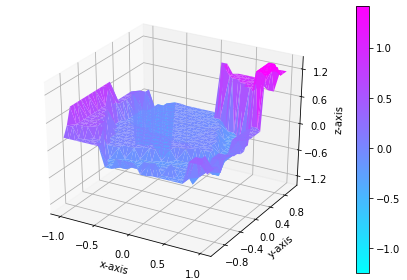

In [7]:
plot_output(xy, output, "Sphere-GSO")